---
# Title: "CYCLISTIC BIKESHARE ANALYSIS"
### Author:  Meenakshi
###  Date  :  11/10/2021
---


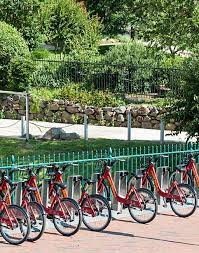


# Problem:

**"Cyclistics"**- A bike share company needed to make more profit in future years by attracting more customer towards its
 annual membership.And according to Cyclistic's financial analyst team  and Lily Moreno,the director of marketing believes that key to the future growth is convert casual rider into members,Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.Increasing the number of annual membership  could be done by analyze how current Cyclistic's user uses its services.And what strategy to be need to increase its annual membership
 numbers.


## Objective:
 
 To analyse how Cyclistic bike share company'users(Members and Casual) used Cyclistic’s bikes differently over the past 12   months.



## Data Source for Analysis :

 Downloaded the data of previous 12 months Cyclistic trip data for this analysis



 Data is further organised and cleaned as:

* Separating started_at column to columns started_year, started_month, started_date,started_day and started_time.*
* Separating ended_at to ended_date and ended_time.*
* Adding a column ride_length.*
* Calculate the ride_length by subtracting started_time to ended_time.*
* Changing ride_length to minute.*
* Deleted the column whose ride length(in minute) is equal to zero to remove the bad data.*


##  Install required packages:
* tidyverse for data import and wrangling *
* lubridate for date functions *
* ggplot for visualization *


In [1]:


library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)    #helps visualize data



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
## STEP 1: COLLECT DATA(uploading data for previous 12 months)



data_oct_2020<- read_csv("../input/cyclistic-data/202010-cyclistic-biketrip.csv")

data_nov_2020<- read_csv("../input/cyclistic-data/202011-cyclistic-biketrip.csv")

data_dec_2020<- read_csv("../input/cyclistic-data/202012-cyclistic-biketrip.csv")

data_jan_2021<- read_csv("../input/cyclistic-data/202101-cyclistic-biketrip.csv")

data_feb_2021<- read_csv("../input/cyclistic-data/202102-cyclistic-biketrip.csv")

data_mar_2021<- read_csv("../input/cyclistic-data/202103-cyclistic-biketrip.csv")

data_apr_2021<- read_csv("../input/cyclistic-data/202104-cyclistic-biketrip.csv")

data_may_2021<- read_csv("../input/cyclistic-data/202105-cyclistic-biketrip.csv")

data_june_2021<-read_csv("../input/cyclistic-data/202106-cyclistic-biketrip.csv")

data_july_2021<-read_csv("../input/cyclistic-data/202107-cyclistic-biketrip.csv")

data_aug_2021<-read_csv("../input/cyclistic-data/202108-cyclistic-biketrip.csv")

data_sep_2021<-read_csv("../input/cyclistic-data/202109-cyclistic-biketrip.csv")


Rows: 383247 Columns: 19

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): ride_id, rideable_type, started_at, started_date_1, started_month...
dbl   (5): started_year, started_date, ride_length_in_min, start_station_id,...
time  (3): started_time, ended_time, ride_length


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 256813 Columns: 19

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): ride_id, rideable_type, started_at, started_date_1, started_month...
dbl   (5): started_year, started_date, ride_length_in_min, start_station_id,...
time  (3): started_time, ended_time, ride_length


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 130476 Columns: 19

In [3]:
## step 2: removing unwanted column from dataframe
oct_2020 <- select(data_oct_2020,-c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


nov_2020 <- select(data_nov_2020,-c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


dec_2020 <- select(data_dec_2020,-c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


jan_2021 <- select(data_jan_2021,-c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


feb_2021 <- select(data_feb_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


mar_2021 <- select(data_mar_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


apr_2021 <- select(data_apr_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


may_2021 <- select(data_may_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


june_2021 <- select(data_june_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))



july_2021 <- select(data_july_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


aug_2021 <- select(data_aug_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))


sep_2021 <- select(data_sep_2021, -c('started_at','started_date_1','ride_length','ended_at','start_station_id','end_station_id'))





In [4]:
## STEP 3: Stack individual month's  data frames into one big data frame


yearly_trip_data <- bind_rows(oct_2020,nov_2020,dec_2020,jan_2021,feb_2021,mar_2021,apr_2021,may_2021,june_2021,july_2021,aug_2021,sep_2021)


In [5]:
## STEP 4: viewing the dataframe


colnames(yearly_trip_data) #show column names
nrow(yearly_trip_data)     #How many rows are in data frame?
dim(yearly_trip_data)      #Dimensions of the data frame?
head(yearly_trip_data)     #See the first 6 rows of data frame.  Also tail(all_trips)
str(yearly_trip_data)      #See list of columns and data types (numeric, character, etc)
summary(yearly_trip_data)  #Statistical summary of data


[1] "ride_id"            "rideable_type"      "started_year"      
 [4] "started_month"      "started_date"       "started_day"       
 [7] "started_time"       "ended_date"         "ended_time"        
[10] "ride_length_in_min" "start_station_name" "end_station_name"  
[13] "member_casual"

[1] 4888276

[1] 4888276      13

ride_id,rideable_type,started_year,started_month,started_date,started_day,started_time,ended_date,ended_time,ride_length_in_min,start_station_name,end_station_name,member_casual
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<time>,<chr>,<time>,<dbl>,<chr>,<chr>,<chr>
ACB6B40CF5B9044C,electric_bike,2020,October,31,Saturday,19:39:00,31/10/2020,19:57:00,18,Lakeview Ave & Fullerton Pkwy,Rush St & Hubbard St,casual
DF450C72FD109C01,electric_bike,2020,October,31,Saturday,23:50:00,01/11/2020,00:04:00,14,Southport Ave & Waveland Ave,Kedzie Ave & Milwaukee Ave,casual
B6396B54A15AC0DF,electric_bike,2020,October,31,Saturday,23:00:00,31/10/2020,23:08:00,8,Stony Island Ave & 67th St,University Ave & 57th St,casual
44A4AEE261B9E854,electric_bike,2020,October,31,Saturday,22:16:00,31/10/2020,22:19:00,3,Clark St & Grace St,Broadway & Sheridan Rd,casual
10B7DD76A6A2EB95,electric_bike,2020,October,31,Saturday,19:38:00,31/10/2020,19:54:00,16,Southport Ave & Wrightwood Ave,Stave St & Armitage Ave,casual
DA6C3759660133DA,electric_bike,2020,October,29,Thursday,17:38:00,29/10/2020,17:45:00,7,Larrabee St & Division St,Wells St & Huron St,casual


tibble [4,888,276 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4888276] "ACB6B40CF5B9044C" "DF450C72FD109C01" "B6396B54A15AC0DF" "44A4AEE261B9E854" ...
 $ rideable_type     : chr [1:4888276] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_year      : num [1:4888276] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ started_month     : chr [1:4888276] "October" "October" "October" "October" ...
 $ started_date      : num [1:4888276] 31 31 31 31 31 29 29 29 28 29 ...
 $ started_day       : chr [1:4888276] "Saturday" "Saturday" "Saturday" "Saturday" ...
 $ started_time      : 'hms' num [1:4888276] 19:39:00 23:50:00 23:00:00 22:16:00 ...
  ..- attr(*, "units")= chr "secs"
 $ ended_date        : chr [1:4888276] "31/10/2020" "01/11/2020" "31/10/2020" "31/10/2020" ...
 $ ended_time        : 'hms' num [1:4888276] 19:57:00 00:04:00 23:08:00 22:19:00 ...
  ..- attr(*, "units")= chr "secs"
 $ ride_length_in_min: num [1:4888276] 18 14 8 3 16

   ride_id          rideable_type       started_year  started_month     
 Length:4888276     Length:4888276     Min.   :2020   Length:4888276    
 Class :character   Class :character   1st Qu.:2021   Class :character  
 Mode  :character   Mode  :character   Median :2021   Mode  :character  
                                       Mean   :2021                     
                                       3rd Qu.:2021                     
                                       Max.   :2021                     
  started_date   started_day        started_time       ended_date       
 Min.   : 1.00   Length:4888276     Length:4888276    Length:4888276    
 1st Qu.: 8.00   Class :character   Class1:hms        Class :character  
 Median :15.00   Mode  :character   Class2:difftime   Mode  :character  
 Mean   :15.56                      Mode  :numeric                      
 3rd Qu.:23.00                                                          
 Max.   :31.00                                     


   casual    member 
0.4496859 0.5503141 

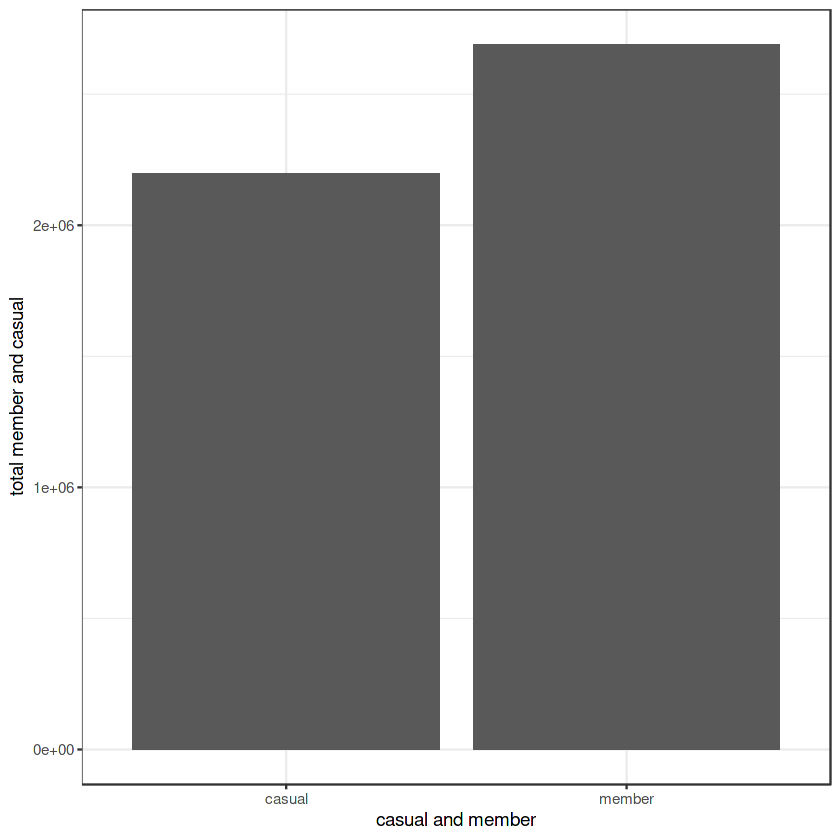

In [6]:
## step 5: change as factor to catagoriacal values of our dataframe
yearly_trip_data$member_casual = as.factor(yearly_trip_data$member_casual)
yearly_trip_data$rideable_type = as.factor(yearly_trip_data$rideable_type)

#Visualisation of number of casual and members
ggplot(yearly_trip_data,aes(x = member_casual))+
  theme_bw()+
  geom_bar()+
  labs(y = "total member and casual",x = "casual and member")
  
  
   #calculate percentages of member and casual
  prop.table(table(yearly_trip_data$member_casual))


In [7]:

## STEP 6: CONDUCT DESCRIPTIVE ANALYSIS


# Descriptive analysis on ride_length_in_min (all figures in minutes)
mean(yearly_trip_data$ride_length_in_min)   #straight average (total ride length / rides)
median(yearly_trip_data$ride_length_in_min) #midpoint number in the ascending array of ride lengths
max(yearly_trip_data$ride_length_in_min)    #longest ride
min(yearly_trip_data$ride_length_in_min)    #shortest ride


[1] 19.82751

[1] 12

[1] 1439

[1] 1

In [8]:
## STEP 7: summary of yearly_trip_data


summary(yearly_trip_data$ride_length_in_min)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   12.00   19.83   21.00 1439.00 

In [9]:
## STEP 8: Compare members and casual users


aggregate(yearly_trip_data$ride_length_in_min ~ yearly_trip_data$member_casual, FUN = mean)
aggregate(yearly_trip_data$ride_length_in_min ~ yearly_trip_data$member_casual, FUN = median)
aggregate(yearly_trip_data$ride_length_in_min ~ yearly_trip_data$member_casual, FUN = max)
aggregate(yearly_trip_data$ride_length_in_min ~ yearly_trip_data$member_casual, FUN = min)


yearly_trip_data$member_casual,yearly_trip_data$ride_length_in_min
<fct>,<dbl>
casual,26.77426
member,14.15102


yearly_trip_data$member_casual,yearly_trip_data$ride_length_in_min
<fct>,<dbl>
casual,16
member,10


yearly_trip_data$member_casual,yearly_trip_data$ride_length_in_min
<fct>,<dbl>
casual,1439
member,1439


yearly_trip_data$member_casual,yearly_trip_data$ride_length_in_min
<fct>,<dbl>
casual,1
member,1


In [10]:

## STEP 9: Calculate the average ride length according to each day of the week for members vs casual users


aggregate(yearly_trip_data$ride_length_in_min ~ yearly_trip_data$member_casual, FUN = mean)
aggregate(yearly_trip_data$ride_length_in_min ~ yearly_trip_data$member_casual + yearly_trip_data$started_day, FUN = mean)

# fixing the order of days of the week
yearly_trip_data$started_day <- ordered(yearly_trip_data$started_day, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

yearly_trip_data$member_casual,yearly_trip_data$ride_length_in_min
<fct>,<dbl>
casual,26.77426
member,14.15102


yearly_trip_data$member_casual,yearly_trip_data$started_day,yearly_trip_data$ride_length_in_min
<fct>,<chr>,<dbl>
casual,Friday,25.38807
member,Friday,14.83163
casual,Monday,27.24985
member,Monday,13.40247
casual,Saturday,29.46177
member,Saturday,15.84362
casual,Sunday,30.78807
member,Sunday,15.71340
casual,Thursday,22.78312


In [11]:
# analyze  data by type and weekday for member and casual user

yearly_trip_data %>% 
  group_by(member_casual, started_day) %>%                        #groups by user type and weekday
  
  summarise(average_duration = mean(ride_length_in_min)) %>%      #calculates the number of rides and average duration  
  arrange(member_casual, started_day)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,started_day,average_duration
<fct>,<ord>,<dbl>
casual,Sunday,30.78807
casual,Monday,27.24985
casual,Tuesday,23.95752
casual,Wednesday,22.74595
casual,Thursday,22.78312
casual,Friday,25.38807
casual,Saturday,29.46177
member,Sunday,15.71340
member,Monday,13.40247


$x
[1] "member and casual"

attr(,"class")
[1] "labels"

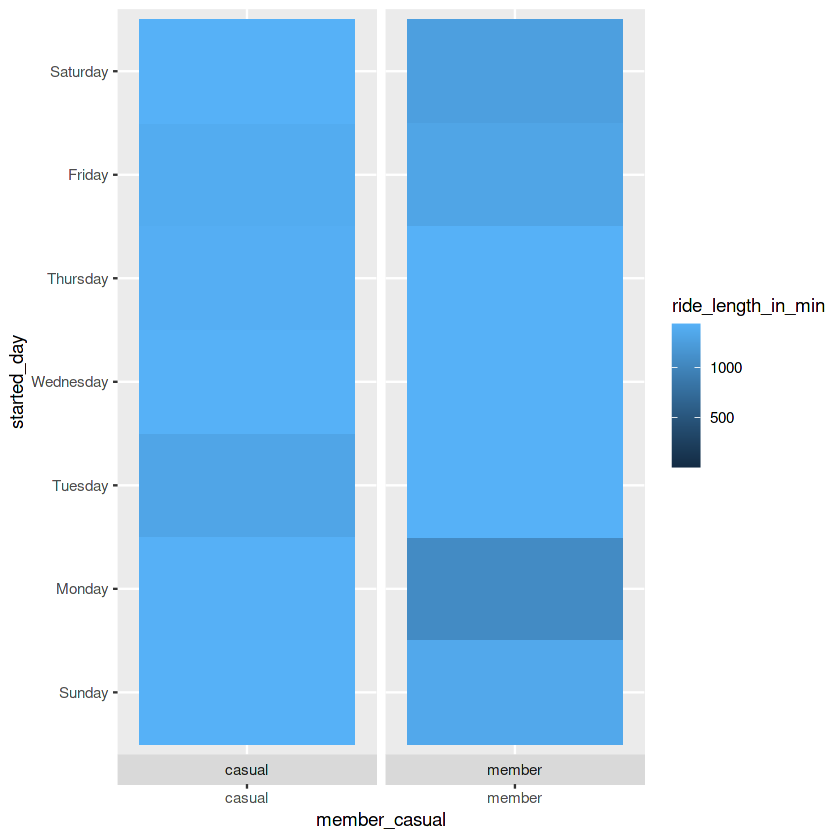

In [12]:
## step 10:  Comparing ride duration or ride length for member and casual by weekday on heatmap 
yearly_trip.heatmap <- ggplot(data = yearly_trip_data, mapping = aes(x = member_casual,y = started_day,
                                                                            fill = ride_length_in_min)) +
  geom_tile() +
  facet_grid(~member_casual,switch = "x", scales = "free_x", space = "free_x")

  xlab(label = "member and casual")

yearly_trip.heatmap

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



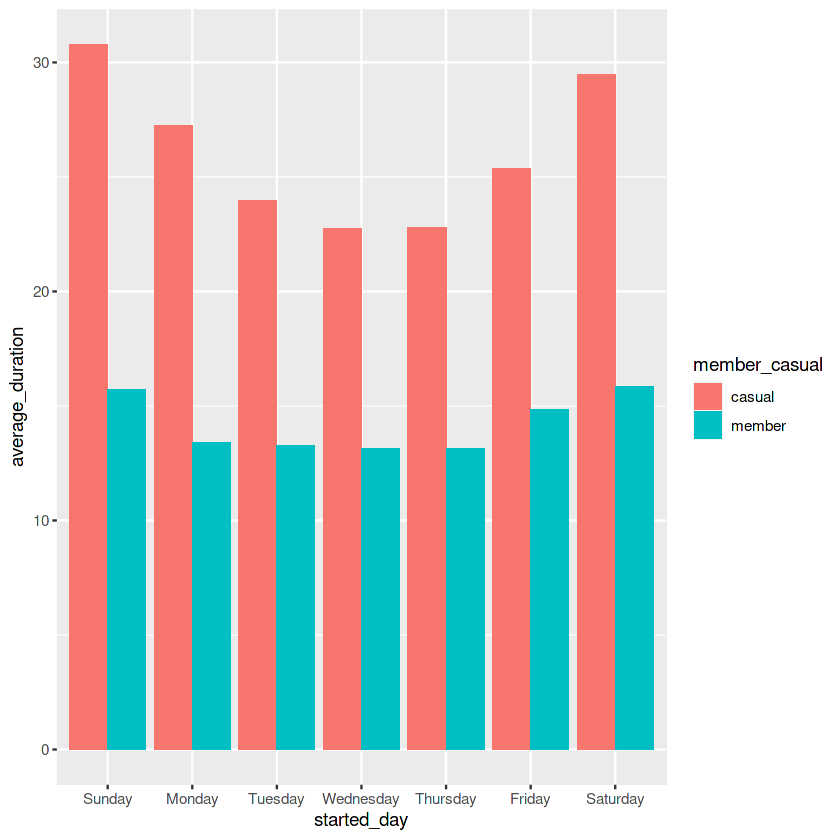

In [13]:
## step 11: visualize the number of rides for member and casual by days of the week

yearly_trip_data %>% 
  
  group_by(member_casual, started_day) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length_in_min)) %>% 
  arrange(member_casual, started_day)  %>% 
  ggplot(aes(x = started_day, y = average_duration, fill = member_casual)) +

  geom_col(position = "dodge")
  

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



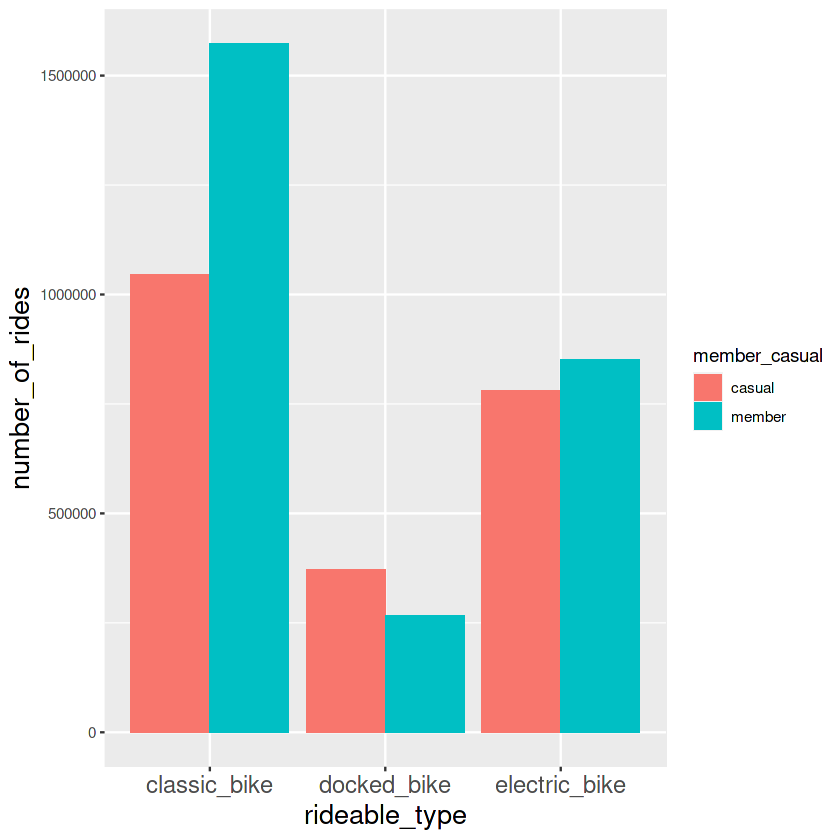

In [14]:


## step 12: visualize the number of rides for member and casual by type of bike they used for ride

yearly_trip_data %>% 
  
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length_in_min)) %>% 
  arrange(member_casual, rideable_type)  %>% 
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) +
  theme(
  axis.title.x = element_text(size = 16),
  axis.text.x = element_text(size = 14),
  axis.title.y = element_text(size = 16))+
  geom_col(position = "dodge")
  

$x
[1] "member and casual"

attr(,"class")
[1] "labels"

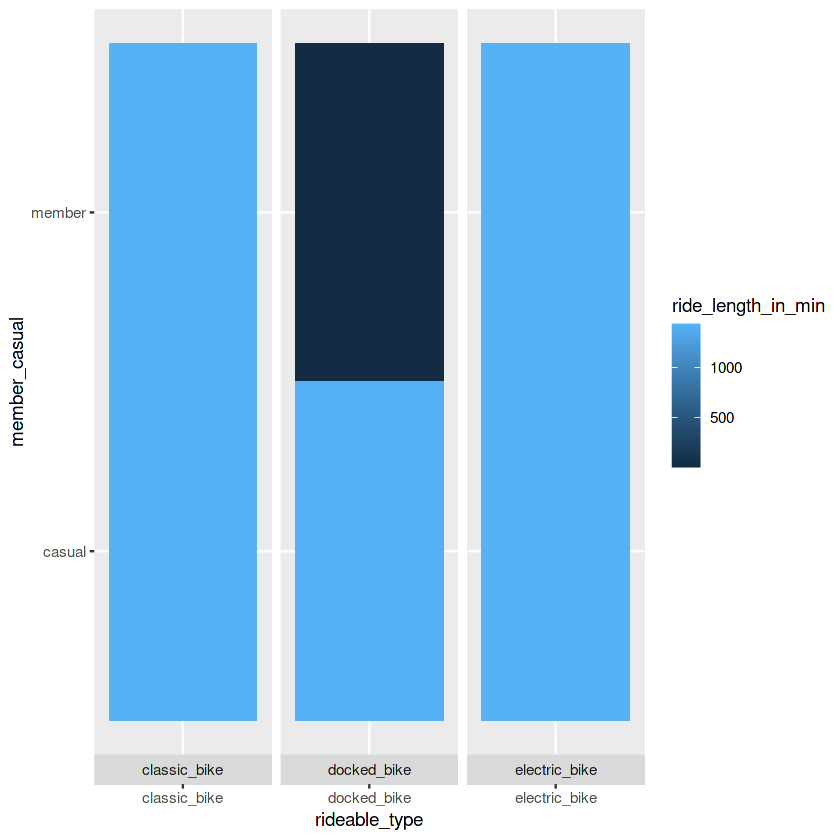

In [15]:
## step 13: Comparing ride duration or ride length for member and casual by ride type on heatmap

yearly_trip.heatmap <- ggplot(data = yearly_trip_data, mapping = aes(x = rideable_type,y = member_casual,
                                                       
                                                               fill = ride_length_in_min)) +
  geom_tile() +
  facet_grid(~rideable_type,switch = "x", scales = "free_x", space = "free_x")

  xlab(label = "member and casual")

yearly_trip.heatmap

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



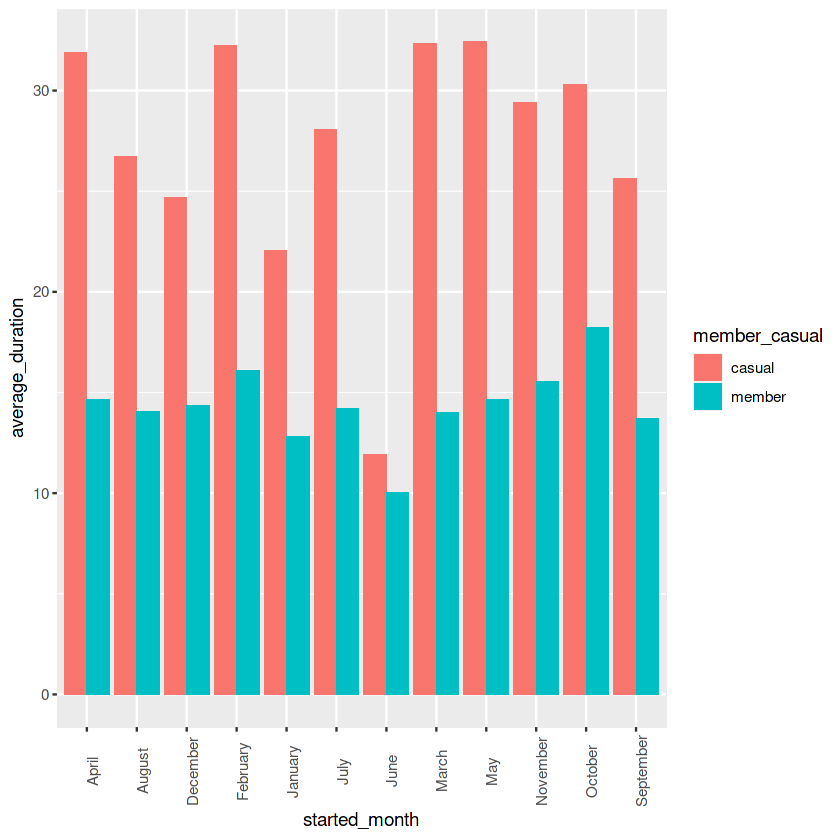

In [16]:
## step 14: Create a visualization for average of ride length by 12 month period(oct - 2020 to sep 2021)

yearly_trip_data %>% 
  
  group_by(member_casual, started_month) %>% 
  summarise(average_duration = mean(ride_length_in_min)) %>% 
  arrange(member_casual, started_month)  %>% 
  ggplot(aes(x = started_month, y = average_duration, fill = member_casual))+
  theme(axis.text.x = element_text(angle = 90))+
  geom_col(position = "dodge",width = 0.9)

$x
[1] "member and casual"

attr(,"class")
[1] "labels"

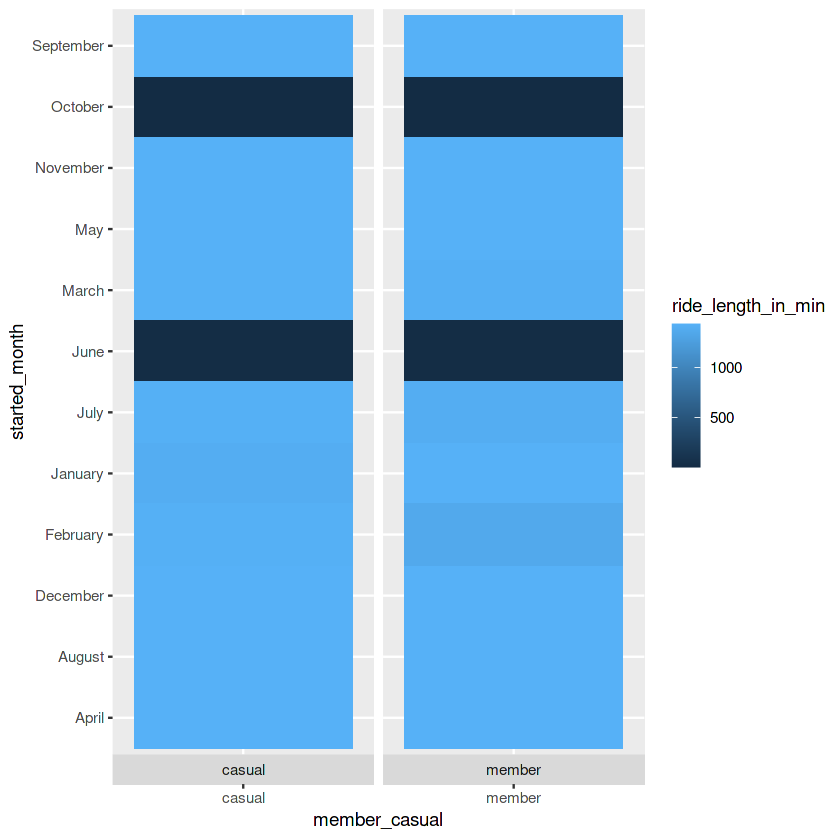

In [17]:
## Step 15: Comparing ride duration or ride length for member and casual by month on heatmap

yearly_trip.heatmap <- ggplot(data = yearly_trip_data, mapping = aes(x = member_casual,y = started_month,
                                                       
                                                               fill = ride_length_in_min)) +
  geom_tile() +
  facet_grid(~member_casual,switch = "x", scales = "free_x", space = "free_x")

  xlab(label = "member and casual")

yearly_trip.heatmap

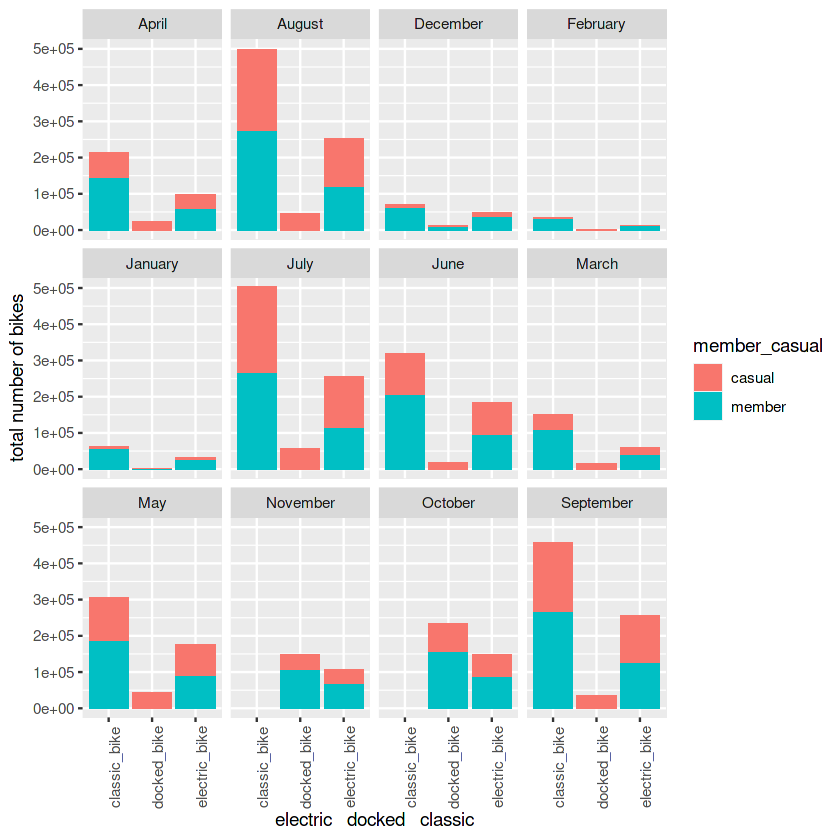

In [18]:
yearly_trip_data$rideable_typel = as.factor(yearly_trip_data$rideable_type)
## step16: Visualisation of bike types uses over the period of(Jan-2020 to sep-2021)
  
 ggplot(yearly_trip_data,aes(x = rideable_type, fill = member_casual))+
  theme(axis.text.x = element_text(angle = 90))+
  
  facet_wrap(~started_month)+
  geom_bar()+
  labs(y = "total number of bikes",x = "electric   docked   classic")

member_casual,c
<fct>,<chr>
casual,Streeter Dr & Grand Ave
member,Clark St & Elm St



Streeter Dr & Grand Ave   Michigan Ave & Oak St   Wells St & Concord Ln 
                  68746                   39403                   39392 
      Clark St & Elm St         Millennium Park 
                  38669                   35832 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



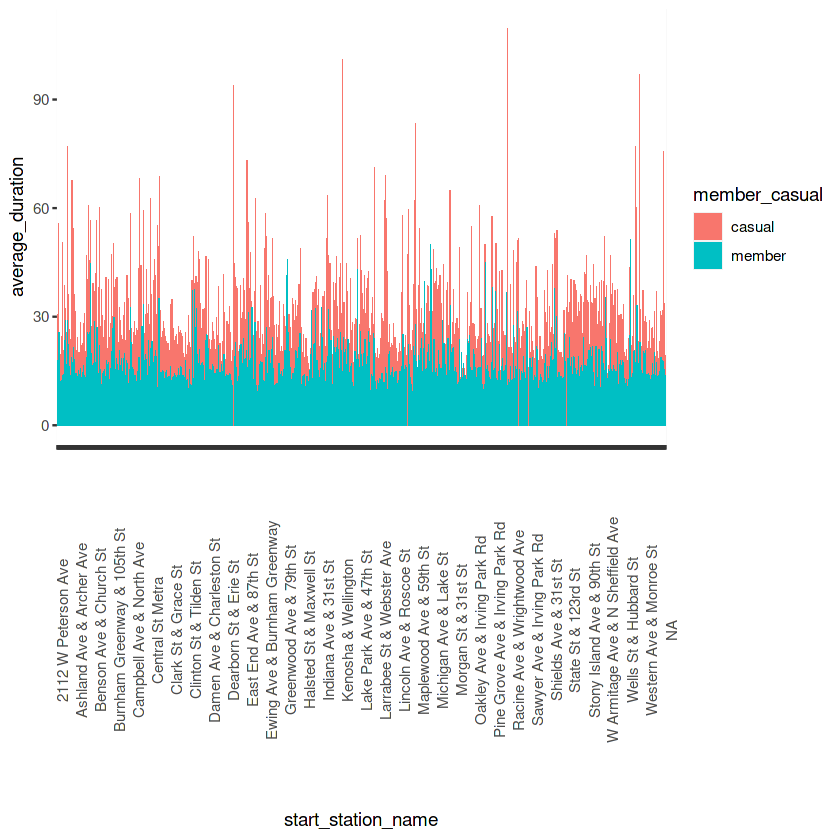

In [19]:
## step 17: Top 5 stations used by member and casual user
yearly_trip_data$start_station_name = as.factor(yearly_trip_data$start_station_name)

yearly_trip_data %>% 
  group_by(member_casual) %>% 
  summarise(c = names(table(start_station_name))[which.max(table(start_station_name))])
 sort(table(yearly_trip_data$start_station_name), decreasing = TRUE)[1:5]
 
yearly_trip_data %>% 
  
  group_by(member_casual, start_station_name) %>% 
  summarise(average_duration = mean(ride_length_in_min)) %>% 
  arrange(member_casual, start_station_name)  %>% 
  ggplot(aes(x = start_station_name, y = average_duration, fill = member_casual))+
  theme(axis.text.x = element_text(angle = 90))+
  scale_x_discrete(guide = guide_axis(check.overlap = TRUE))+
  
  geom_col(position = "dodge",width = 0.5)

## Observation

* Average duration of rides of casuals Cyclistic's customer is much higher than the members during the previous 12       months period *

 casual      26.77426

 member      14.15102
 

* October and June are two least popular months when both type of user (casual and member) doesn't like to ride.But for these mentioned months(oct and june) still average duration of casual user is greater than members.
Classic bikes and electric bikes are more popular among member users while casual user like to use all the three types of bikes *


* Average ride lengths of casuals users is higher than the members when compare to the days of the week, that is        Sunday to Monday.Specially on Sunday and Saturday average casual's rides duration is much higher than the           
  members.*
  

## Recommendation

* Average duration or ride length covered by casual user is more than members it means to turn casual to member will definately help company to enhance its profit margin.

* Docked bike are more popular amongst casual than members so providing some offer on these type of bike might help to turn casual user to members.

* Casual user more like to ride on weekends rather than weekdays so encourage them to use bike on weekdays by offering some monthly discount plan could help them to turn into members.Also during october and month of june when bike ride is not popular among both types of user company could plan some idea to encourage its user to use bike ride for these two months.